# Results Analysis

## Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
scores = {}
for model in os.listdir('outputs'):
	scores[model] = {}
	for files in os.listdir(f'outputs/{model}'):
		if files.endswith('metrics.csv'):
			scores[model]['train'] = pd.read_csv(f'outputs/{model}/{files}')
		if files.endswith('scores.csv'):
			scores[model]['test'] = pd.read_csv(f'outputs/{model}/{files}')

## Train & Val Loss

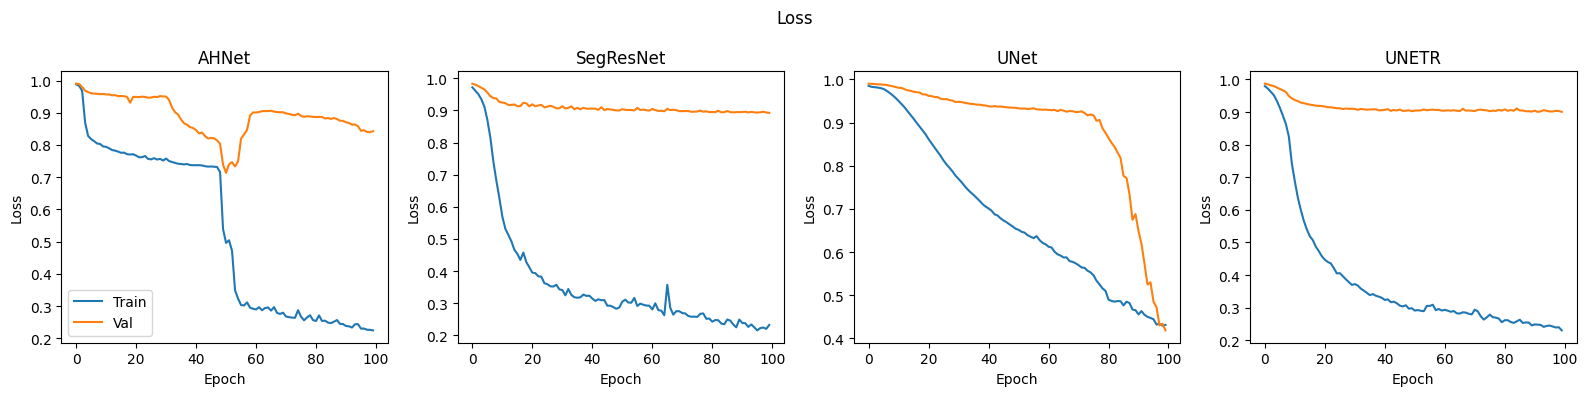

In [3]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):

	# Load scores
	sc = scores[model]['train']

	# Plot
	plt.subplot(1, len(scores), i+1)
	plt.plot(sc["train_loss"], label='Train')
	plt.plot(sc["val_loss"], label='Val')
	plt.title(model)
	plt.xlabel("Epoch")
	plt.ylabel("Loss")
	if i == 0:
		plt.legend()

plt.suptitle("Loss")
plt.tight_layout()
plt.show()

## Validation Dice Score

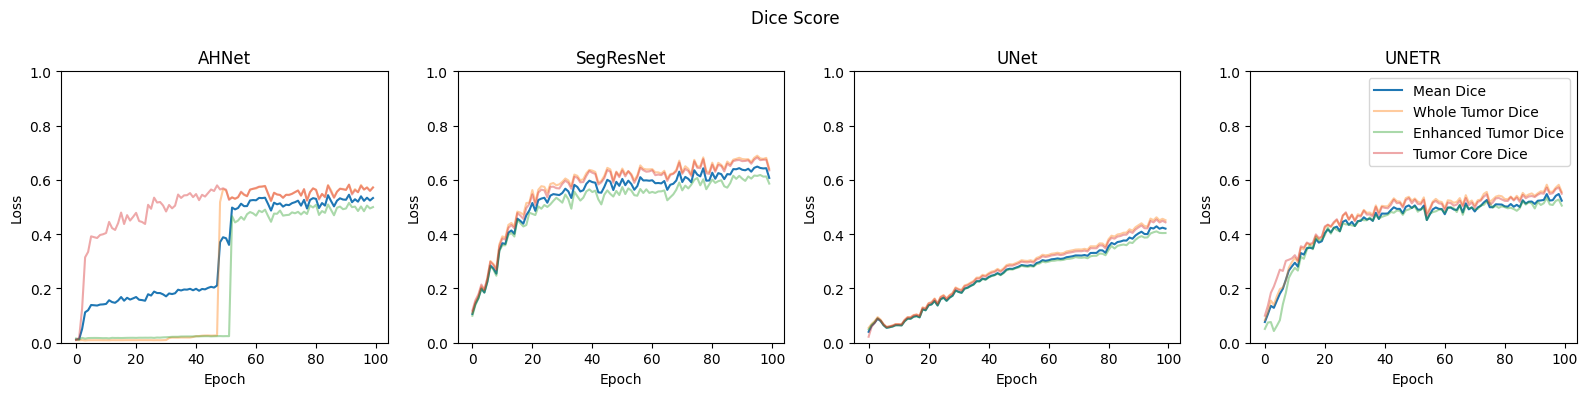

In [4]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):
	
	# Load scores
	sc = scores[model]['train']

	# Plots
	plt.subplot(1, len(scores), i+1)
	plt.plot(sc["metric"], label='Mean Dice')
	plt.plot(sc["metric_wt"], label='Whole Tumor Dice', alpha=0.4)
	plt.plot(sc["metric_et"], label='Enhanced Tumor Dice', alpha=0.4)
	plt.plot(sc["metric_tc"], label='Tumor Core Dice', alpha=0.4)
	plt.title(model)
	plt.xlabel("Epoch")
	plt.ylabel("Loss")
	plt.ylim(0, 1)
	if i == 3:
		plt.legend()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

## Test Dice Score Analysis

In [5]:
channels = ['TC', 'WT', 'ET']

### Mean Dice

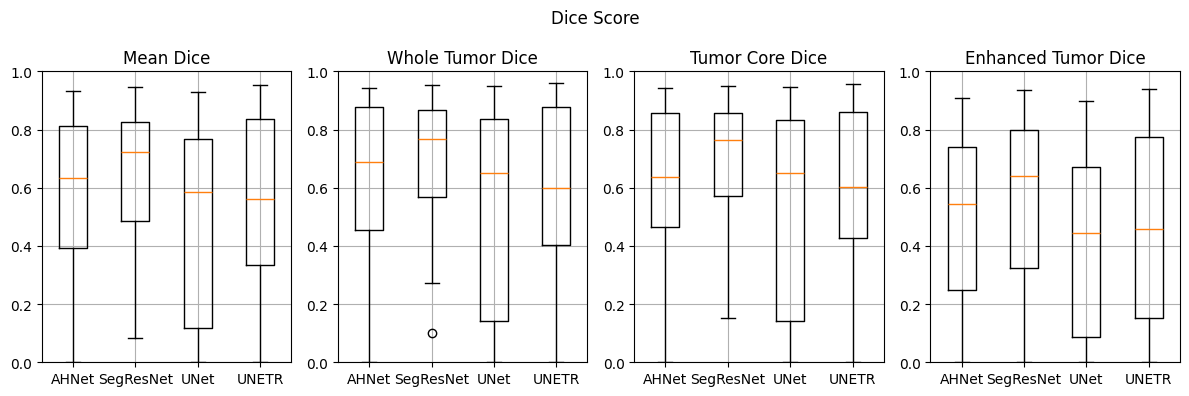

In [6]:
plt.figure(figsize=(12, 4))

mean, wt, tc, et = [], [], [], []
for i, model in enumerate(scores.keys()):
	# Load scores
	sc = scores[model]['test']
	mean.append(sc["Dice"])
	wt.append(sc["Dice WT"])
	tc.append(sc["Dice TC"])
	et.append(sc["Dice ET"])

plt.subplot(1, 4, 1)
plt.boxplot(mean, labels=scores.keys())
plt.title("Mean Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 2)
plt.boxplot(wt, labels=scores.keys())
plt.title("Whole Tumor Dice")
plt.ylim(0, 1)	
plt.grid()

plt.subplot(1, 4, 3)
plt.boxplot(tc, labels=scores.keys())
plt.title("Tumor Core Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 4)
plt.boxplot(et, labels=scores.keys())
plt.title("Enhanced Tumor Dice")
plt.ylim(0, 1)
plt.grid()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

### TC, WT, ET Dice

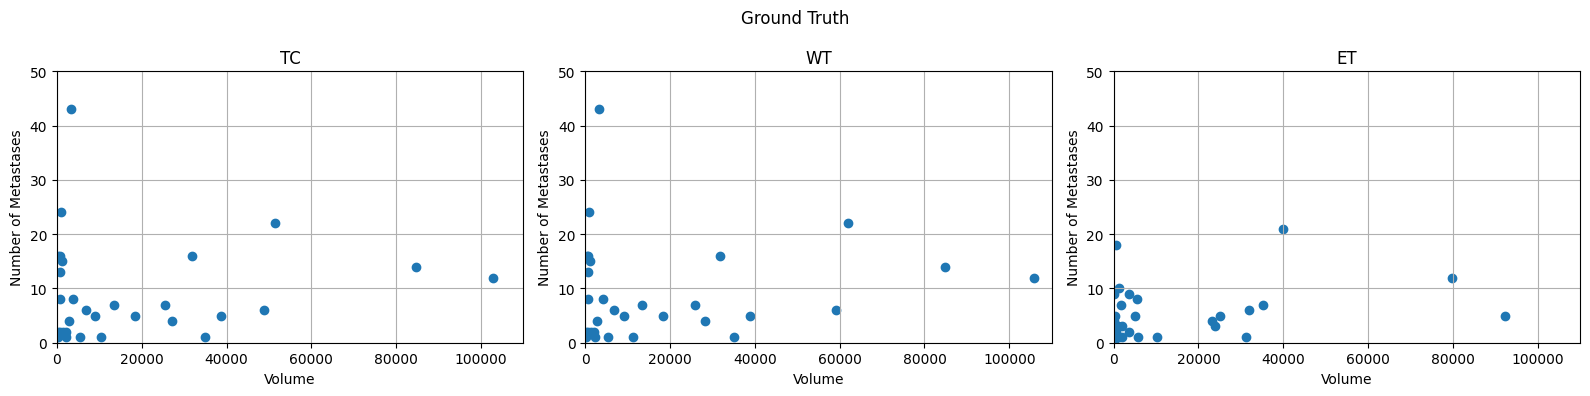

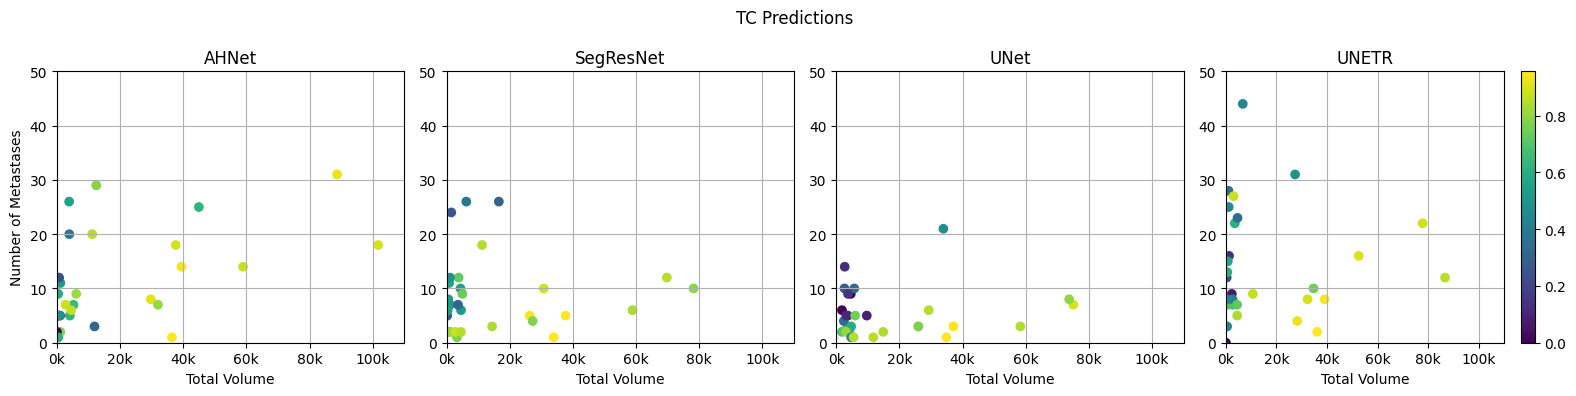

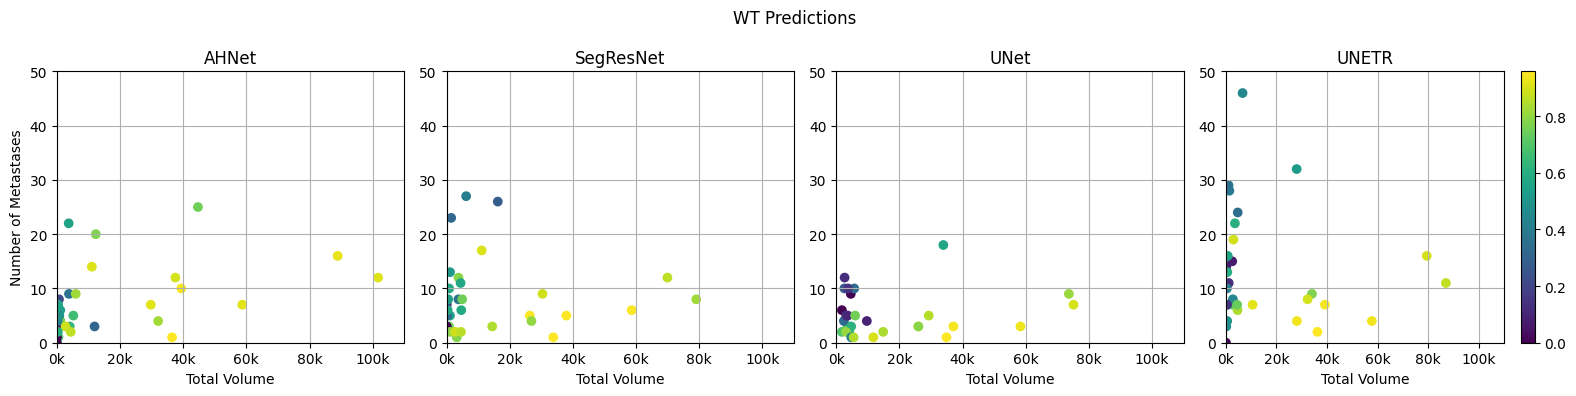

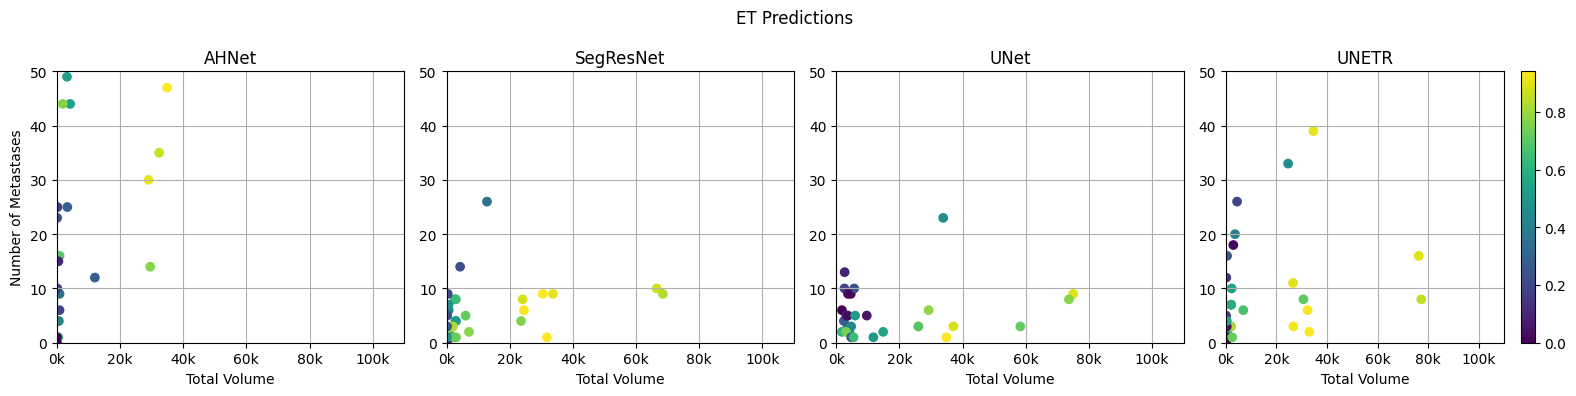

In [7]:
# Scatter Based on NM and V

# GT 
plt.figure(figsize=(16, 4))
for i, channel in enumerate(channels):
	plt.subplot(1, 3, i+1)
	plt.scatter(scores['AHNet']['test'][f'GT V {channel}'], scores['AHNet']['test'][f'GT NM {channel}'])
	plt.title(channel)
	plt.xlabel("Volume")
	plt.ylabel("Number of Metastases")
	plt.xlim(0, 110000)
	plt.ylim(0, 50)
	plt.grid()
plt.suptitle("Ground Truth")
plt.tight_layout()
plt.show()

# Predicted
for channel in channels:
	plt.figure(figsize=(16, 4))
	for i, model in enumerate(scores.keys()):
		plt.subplot(1, len(scores), i+1)
		plt.scatter(scores[model]['test'][f'Pred V {channel}'], scores[model]['test'][f'Pred NM {channel}'], c=scores[model]['test'][f'Dice {channel}'])
		plt.title(model)
		plt.xlabel("Total Volume")
		plt.xlim(0, 110000)
		plt.xticks([0, 20000, 40000, 60000, 80000, 100000], 
           ['{}k'.format(int(x/1000)) for x in [0, 20000, 40000, 60000, 80000, 100000]])
		plt.ylim(0, 50)
		plt.grid()
		if i == 0:
			plt.ylabel("Number of Metastases")
		if i == 3:
			plt.colorbar()
	plt.suptitle(f"{channel} Predictions")
	plt.tight_layout()
	plt.show()